In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import astropy.constants as c
plt.style.use('serif_style')

au = c.au.cgs.value
year = 24*60*60*365
MS = c.M_sun.cgs.value
ME = c.M_earth.cgs.value

folder = '0.50_5.89e-15'

directory = os.getcwd()+f'/../data/{folder}/'
print(directory)

/Users/jwilliams/Documents/Github_Repos/DD-diskevol/plots/../data/0.50_5.89e-15/


In [2]:
# import glob
# files = os.listdir(directory)
# files = [file[:-4] for file in files]

In [5]:
class simulation():
    '''
    Class object that grabs and stores all the relevant data from
    the DD18 simulations.
    '''
    def __init__(self, directory):
        files = os.listdir(directory)
        files = [file[:-4] for file in files if file.endswith('.dat')]
        files = list( filter(lambda x: 'infall2' not in x, files))   # Remove unwanted files like infall2

        for file in files:
            data = self.read_data(file, directory)
            setattr(self, file, data)
        print(self.sigma.shape)
        self.rgrid = pd.read_csv(directory+'../grid.info').values[:,0]
    

    def read_data(self, file, directory=directory):
        '''
        Function to read in the data. Reshapes the data if required,
        and adds an extra row of zeros at t=0 if required.
        '''
        df = pd.read_csv(directory+f'{file}.dat').values
        length = len(df)

        try:
            if length == 281400:
                df = df.reshape(201, 1400)
                return df[1:, :]    # Bin t=0
            elif length == 200:
                return df[:,0]
            else:
                return None
        except ValueError:
            print(f'Error with data "{file}" -> shape is {df.shape}')
    

    def print_shapes(self):
        '''
        Function that prints the shapes of all the non-method attributes
        of the class.
        '''
        attributes = [attr for attr in dir(self) if not attr.startswith('__') and not callable(getattr(self, attr))]
        for object in attributes:
            exec(f"print(f'{object}: {{self.{object}.shape}}') if self.{object} is not None else None")

In [6]:
# sim = simulation(directory)

colors = ["264653","287271","2a9d8f","8ab17d","e9c46a","efb366","f4a261","ee8959","e76f51"]
colors = ['#' + color for color in colors]


In [7]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps as cm

colour_map = cm['autumn']
# colour_map = LinearSegmentedColormap.from_list('cmap', colors)


In [8]:

masses = ['0.1', '0.3', '0.5', '0.55', '0.62', '0.68', '0.76', '0.84', '0.93', '1.00', '1.03', '1.15', '1.27', '1.41']
full_mass_labels = [mass + r'M$_\odot$' for mass in masses]
print(full_mass_labels)

colors = colour_map(np.linspace(0, 1, len(masses)))

# Special Lichtenberg colour
full_mass_labels[9] = '1.00 M$_\\odot$ (L+21)'
full_mass_labels = np.array(full_mass_labels)

# Grab directories of the simulations
simulation_folders = os.listdir(os.getcwd()+'/../data')
simulation_directories = [os.getcwd() + f'/../data/{folder}/' for folder in simulation_folders if folder.endswith('15')]
# Manually reordering because FML
# simulation_directories = [simulation_directories[6], simulation_directories[7], simulation_directories[0], simulation_directories[1], simulation_directories[13], simulation_directories[5], simulation_directories[2],
#                           simulation_directories[11], simulation_directories[12], simulation_directories[3], simulation_directories[4], simulation_directories[9]]
simulation_directories = [simulation_directories[8], simulation_directories[10], simulation_directories[6], simulation_directories[7], simulation_directories[0], simulation_directories[1], simulation_directories[13], simulation_directories[5], simulation_directories[2],
                          simulation_directories[11], simulation_directories[12], simulation_directories[3], simulation_directories[4], simulation_directories[9]]

i = 0
for mass, directory in zip(masses, simulation_directories):
    mass = mass.split('.')
    mass = mass[0] + mass[1]
    print(i)
    i += 1
    print(mass)
    print(directory)
    exec(f"sim_{mass} = simulation('{directory}')")

full_simulation_array = np.array([sim_01, sim_03, sim_05, sim_055, sim_062, sim_068, sim_076, sim_084, sim_093, sim_100, sim_103, sim_115, sim_127, sim_141], dtype=object)

['0.1M$_\\odot$', '0.3M$_\\odot$', '0.5M$_\\odot$', '0.55M$_\\odot$', '0.62M$_\\odot$', '0.68M$_\\odot$', '0.76M$_\\odot$', '0.84M$_\\odot$', '0.93M$_\\odot$', '1.00M$_\\odot$', '1.03M$_\\odot$', '1.15M$_\\odot$', '1.27M$_\\odot$', '1.41M$_\\odot$']
0
01
/Users/jwilliams/Documents/Github_Repos/DD-diskevol/plots/../data/0.10_3.94e-15/
(200, 1400)
1
03
/Users/jwilliams/Documents/Github_Repos/DD-diskevol/plots/../data/0.30_5.18e-15/
(200, 1400)
2
05
/Users/jwilliams/Documents/Github_Repos/DD-diskevol/plots/../data/0.50_5.89e-15/
(200, 1400)
3
055
/Users/jwilliams/Documents/Github_Repos/DD-diskevol/plots/../data/0.55_6.04e-15/
(200, 1400)
4
062
/Users/jwilliams/Documents/Github_Repos/DD-diskevol/plots/../data/0.62_6.20e-15/
(200, 1400)
5
068
/Users/jwilliams/Documents/Github_Repos/DD-diskevol/plots/../data/0.68_6.36e-15/
(200, 1400)
6
076
/Users/jwilliams/Documents/Github_Repos/DD-diskevol/plots/../data/0.76_6.53e-15/
(200, 1400)
7
084
/Users/jwilliams/Documents/Github_Repos/DD-diskevol/pl

In [ ]:
from joecomp.colour_maps import latte
# Shorten it up a bit

sims_to_plot     = [0, 1, 2, 4, 6, 9, 11, 13]
# sims_to_plot = [0]
simulation_array = full_simulation_array[sims_to_plot]
mass_labels      = full_mass_labels[sims_to_plot]
colors           = latte(np.linspace(0, 1, len(simulation_array)))
colors = ["ef476f","f78c6b","ffd166","83d483","06d6a0","0cb0a9","118ab2","073b4c"]
colors = ['#' + color for color in colors]
colors[5] = [1, 0, 0, 1] # Red
print(mass_labels)

['0.1M$_\\odot$' '0.3M$_\\odot$' '0.5M$_\\odot$' '0.62M$_\\odot$'
 '0.76M$_\\odot$' '1.00 M$_\\odot$ (L+21)' '1.15M$_\\odot$'
 '1.41M$_\\odot$']


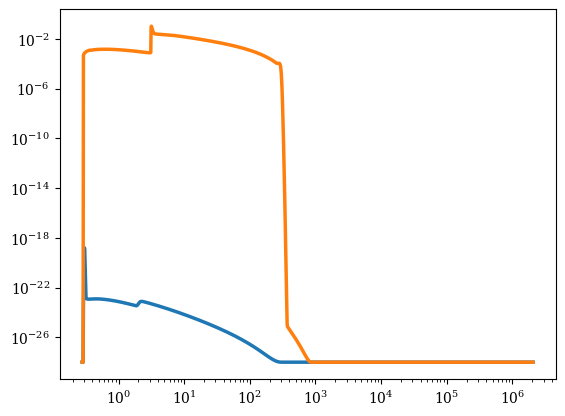

In [ ]:
# plt.loglog(sim_03.rgrid/au, sim_03.sigmad[it])
plt.loglog(sim_03.rgrid/au, sim_03.sigmad[it])
plt.loglog(sim_100.rgrid/au, sim_100.sigmad[it])

199


<>:25: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\o'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_11553/707922530.py:25: SyntaxWarning: invalid escape sequence '\o'
  '''


"\n#\xa0Colourbar\nfrom matplotlib.cm import ScalarMappable\nfrom matplotlib.colors import Normalize\n\ncmappable = ScalarMappable(Normalize(vmin=0.5, vmax=1.41), cmap=colour_map)\nfig.subplots_adjust(left=0.15, right=0.88, hspace=0.12, wspace=0.15)\n\nbbox = ax[1].get_position() #\xa0Grab axis positions\ncax = fig.add_axes([0.9, bbox.y0, 0.03, bbox.y1-bbox.y0])\ncbar = fig.colorbar(cmappable, cax) #\xa0The actual colourbar\n\ncax.axhline(1, color='r')\ncax.text(0, 1, 'L+21', ha='right', va='center', color='r', transform=cax.get_yaxis_transform())\n# cbar.set_ticks([0, 1, 2, 3])\ncbar.set_label(r'Mass [M$_\\odot$]', fontsize=16)\n"

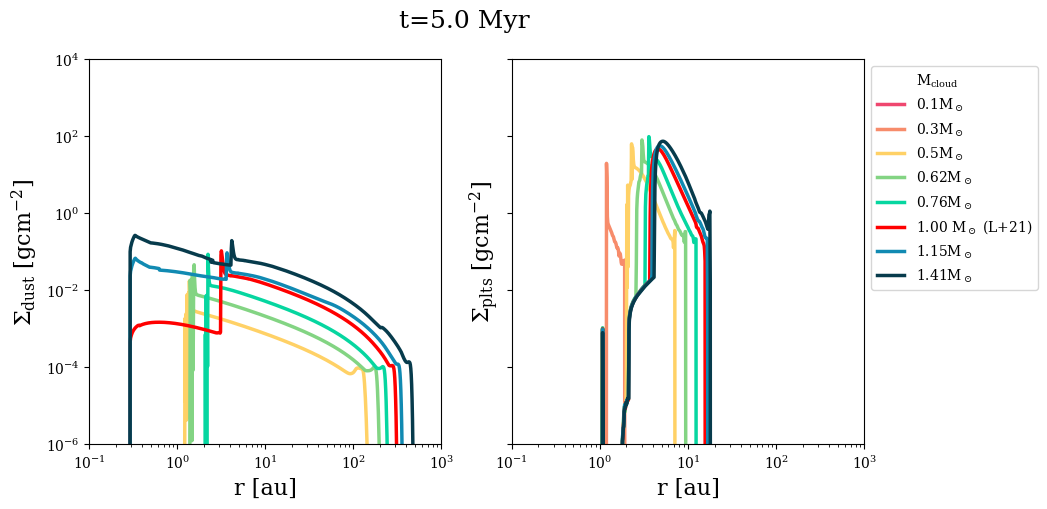

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
it = (sim_100.time/year/1e6).searchsorted(5)
print(it)

zorder = np.zeros(len(masses))
zorder[7] = 1

for sim, clr, z in zip(simulation_array, colors, zorder):
    ax[0].loglog(sim.rgrid/au, sim.sigmad[it, :], color=clr, zorder=z)
    ax[1].loglog(sim.rgrid/au, sim.sigmaplts[it, :], color=clr, zorder=z)

ax[0].set_xlim(1e-1, 1e3)
ax[0].set_ylim(1e-6, 1e4)
fig.suptitle(f't={sim_05.time[it]/year/1e6:.1f} Myr', fontsize=18)
ax[0].set_ylabel(r'$\Sigma_{\rm{dust}}$ [gcm$^{-2}$]')
ax[1].set_ylabel(r'$\Sigma_{\rm{plts}}$ [gcm$^{-2}$]')
[axis.set_xlabel('r [au]') for axis in ax]

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], alpha=0, label=r'M$_{\rm{cloud}}$')]
handles += [Line2D([0], [0], color=clr, label=lbl) for clr, lbl in zip(colors, mass_labels)]

ax[1].legend(handles=handles, bbox_to_anchor=(1,1))

'''
# Colourbar
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

cmappable = ScalarMappable(Normalize(vmin=0.5, vmax=1.41), cmap=colour_map)
fig.subplots_adjust(left=0.15, right=0.88, hspace=0.12, wspace=0.15)

bbox = ax[1].get_position() # Grab axis positions
cax = fig.add_axes([0.9, bbox.y0, 0.03, bbox.y1-bbox.y0])
cbar = fig.colorbar(cmappable, cax) # The actual colourbar

cax.axhline(1, color='r')
cax.text(0, 1, 'L+21', ha='right', va='center', color='r', transform=cax.get_yaxis_transform())
# cbar.set_ticks([0, 1, 2, 3])
cbar.set_label(r'Mass [M$_\odot$]', fontsize=16)
'''

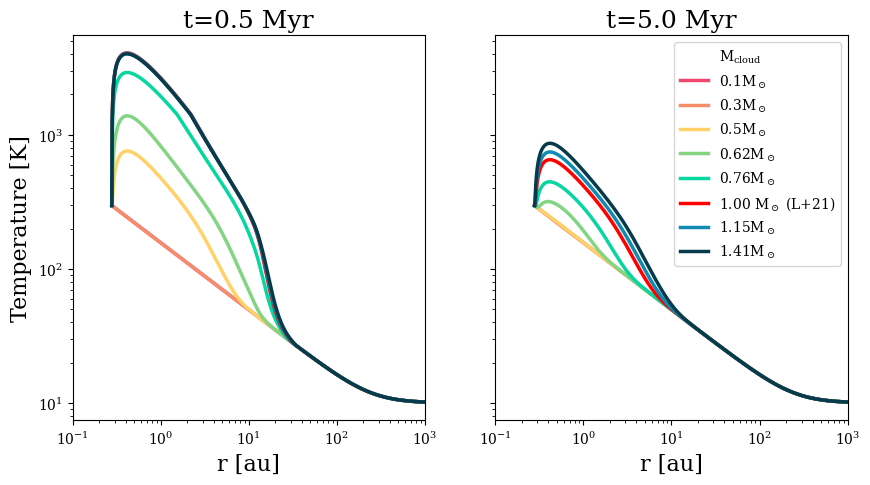

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,5))

it = (sim_05.time/year/1e6).searchsorted(0.5)

for sim, clr, z in zip(simulation_array, colors, zorder):
    ax[0].loglog(sim.rgrid/au, sim.temperature[it, :], color=clr, zorder=z)
    ax[1].loglog(sim.rgrid/au, sim.temperature[-1, :], color=clr, zorder=z)

ax[0].set_xlim(1e-1, 1e3)
ax[0].set_title(f't={sim_05.time[it]/year/1e6:.1f} Myr')
ax[1].set_title(f't={sim_05.time[-1]/year/1e6:.1f} Myr')
ax[0].set_ylabel(r'Temperature [K]')
[axis.set_xlabel('r [au]') for axis in ax]
ax[1].legend(handles=handles, bbox_to_anchor=(1,1))

## Snowline

In [ ]:
# Snowline evolution
for sim in simulation_array:
    sim.snowline_pos = np.zeros_like(sim.time)

    for i, temp_row in enumerate(sim.temperature[1:]):
        idx = np.min( np.where(temp_row <= 150) )
        sim.snowline_pos[i] = sim.rgrid[idx]

0.10012674093702141
0.299901951196135
0.4922868340300276
0.5947918572667339
0.7100397261176118
0.8798236348453844
0.9699559574822073
1.1174758447663231


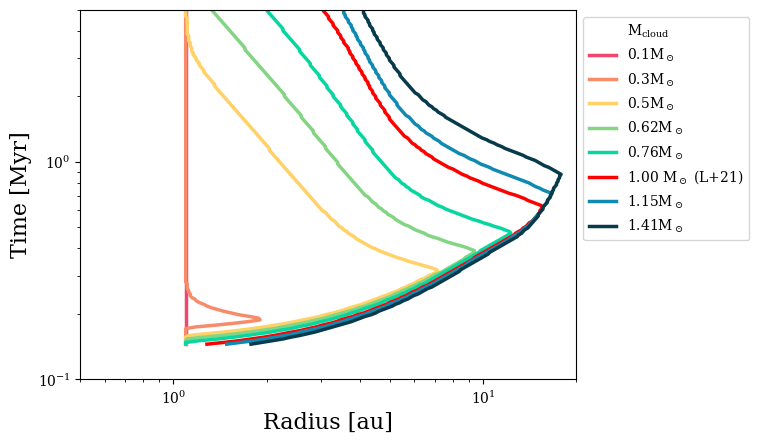

In [ ]:
fig, ax = plt.subplots()

for sim, clr in zip(simulation_array, colors):
    print(sim.mstar[-1]/MS)
    ax.loglog(sim.snowline_pos[6:-1]/au, sim.time[6:-1]/year/1e6, color=clr) 

ax.set_xlim(0.5, 20)
ax.set_ylim(0.1, 5)
ax.set_ylabel('Time [Myr]')
ax.set_xlabel('Radius [au]')

ax.legend(handles=handles, bbox_to_anchor=(1,1))

## Pebble flux

0.10012674093702141
0.299901951196135
0.4922868340300276
0.5947918572667339
0.7100397261176118
0.8798236348453844
0.9699559574822073
1.1174758447663231


<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_11553/2689667397.py:13: SyntaxWarning: invalid escape sequence '\o'
  ax[0].set_ylabel('Pebble flux [M$_{\oplus}$ yr$^{-1}$]')


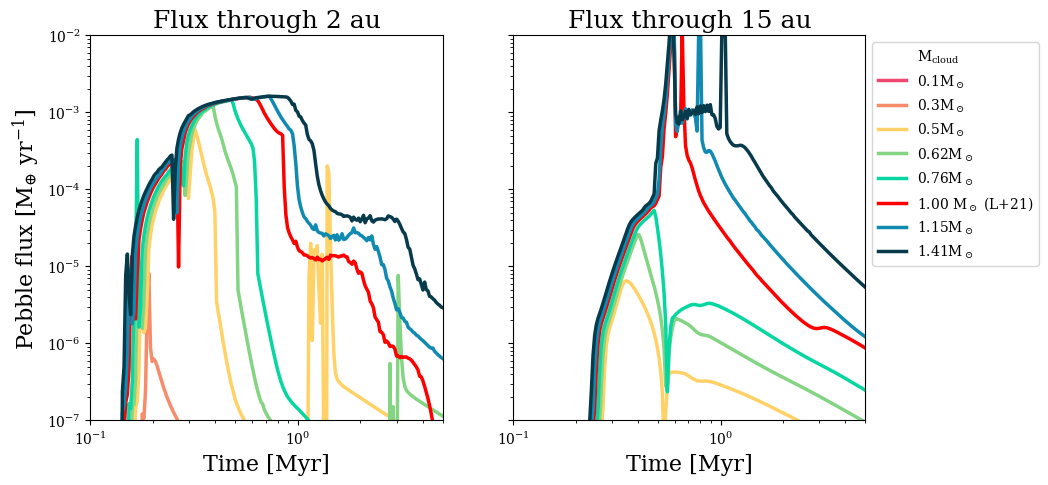

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

ir = (sim_05.rgrid/au).searchsorted([1, 2, 15])

for sim, clr in zip(simulation_array, colors):
    print(sim.mstar[-1]/MS)
    ax[0].loglog(sim.time/year/1e6, abs(sim.mflux[:, ir[1]]) / ME * year, color=clr)
    ax[1].loglog(sim.time/year/1e6, abs(sim.mflux[:, ir[2]]) / ME * year, color=clr)

ax[0].set_xlim(0.1, 5)
ax[0].set_ylim(1e-7, 1e-2)
[axis.set_xlabel('Time [Myr]') for axis in ax]
ax[0].set_ylabel('Pebble flux [M$_{\oplus}$ yr$^{-1}$]')
[ax[i-1].set_title(f'Flux through {(sim_05.rgrid/au)[ir[i]]:.0f} au') for i in range(1,3)]
ax[1].legend(handles=handles, bbox_to_anchor=(1,1))

## Masses

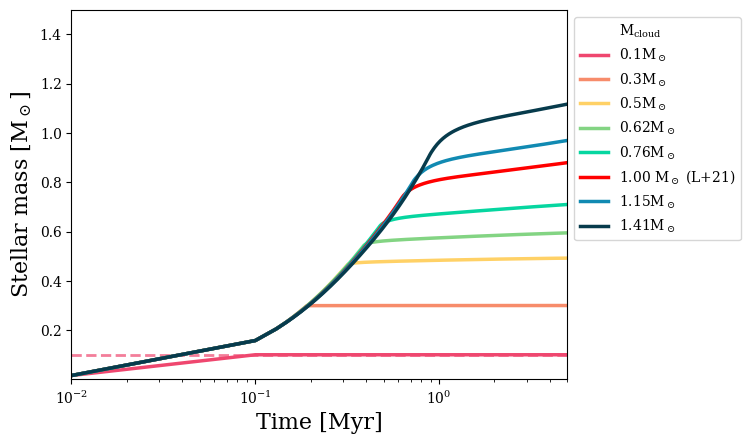

In [ ]:
# stellar mass
xlims = (0.01, 5)
ylims = (1e-8, 1.5)
fig_star, ax_star = plt.subplots()

for sim, clr in zip(simulation_array, colors):
    ax_star.semilogx(sim.time/year/1e6, sim.mstar/MS, color=clr)
ax_star.set_xlim(xlims)
ax_star.set_ylim(ylims)
ax_star.legend(handles=handles, bbox_to_anchor=(1,1))
ax_star.set_ylabel(r'Stellar mass [M$_\odot$]')
ax_star.set_xlabel(('Time [Myr]'))
ax_star.axhline(0.1, linestyle='dashed', color=colors[0], lw=2, alpha=0.7, zorder=0)

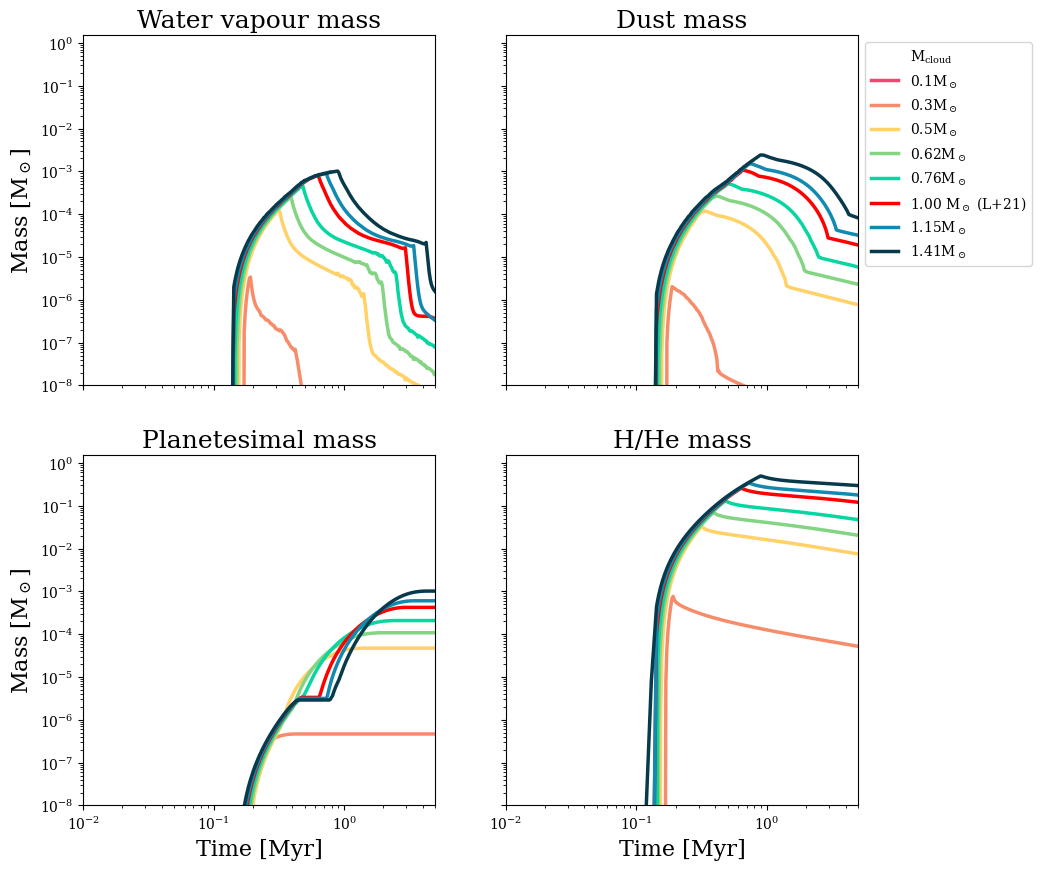

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True, dpi=100)
ax_disc = ax.flat

# dr element for integral
dr = np.zeros_like(sim_05.rgrid)
dr_from_grid = np.diff(sim_05.rgrid)
dr_ratio = dr_from_grid[1:]/dr_from_grid[:-1]
dr[:-1] = dr_from_grid
dr[-1] = dr_from_grid[-1] * dr_ratio[0]

for sim, clr, z in zip(simulation_array, colors, zorder):
    # Masses
    H2O_gas      = np.sum(2 * np.pi * sim.rgrid * sim.sigmavap * dr, axis=1) / MS
    dust_mass    = np.sum(2 * np.pi * sim.rgrid * sim.sigmad * dr, axis=1) / MS
    plts_mass    = np.sum(2 * np.pi * sim.rgrid * sim.sigmaplts * dr, axis=1) / MS
    gas_mass     = np.sum(2 * np.pi * sim.rgrid * sim.sigma * dr, axis=1) / MS
# R1_mass      = np.sum(2 * np.pi * rgrid * R1_sigmaplts * dr, axis=1)
# R2_mass      = np.sum(2 * np.pi * rgrid * R2_sigmaplts * dr, axis=1)
    
    ax_disc[0].loglog(sim.time/year/1e6, H2O_gas, color=clr, zorder=z)
    ax_disc[1].loglog(sim.time/year/1e6, dust_mass, color=clr, zorder=z)
    ax_disc[2].loglog(sim.time/year/1e6, plts_mass, color=clr, zorder=z)
    ax_disc[3].loglog(sim.time/year/1e6, gas_mass, color=clr, zorder=z)

ax_disc[0].set_xlim(xlims)
ax_disc[0].set_ylim(ylims)
ax_disc[0].set_title('Water vapour mass')
ax_disc[1].set_title('Dust mass')
ax_disc[2].set_title('Planetesimal mass')
ax_disc[3].set_title('H/He mass')
[axis.set_ylabel(r'Mass [M$_\odot$]') for axis in ax[:,0]]
[axis.set_xlabel('Time [Myr]') for axis in ax[1,:]]
ax_disc[1].legend(handles=handles, bbox_to_anchor=(1,1))

## Planetesimal formation rates

In [ ]:
# Colors for planetesimal formation rate
rate_colors = ["26547c","ef476f","ffd166"]
rate_colors = ['#' + color for color in rate_colors]

/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_11553/2421423529.py:14: RuntimeWarning: divide by zero encountered in log
  axis.contourf(sim.rgrid/au, sim.time[1:]/year/1e6, np.log(plts_rate),    # IT'S LOG BASE e?! WHO DOES THAT
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_11553/2421423529.py:27: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis_plts.set_xlim(0.5, 20)


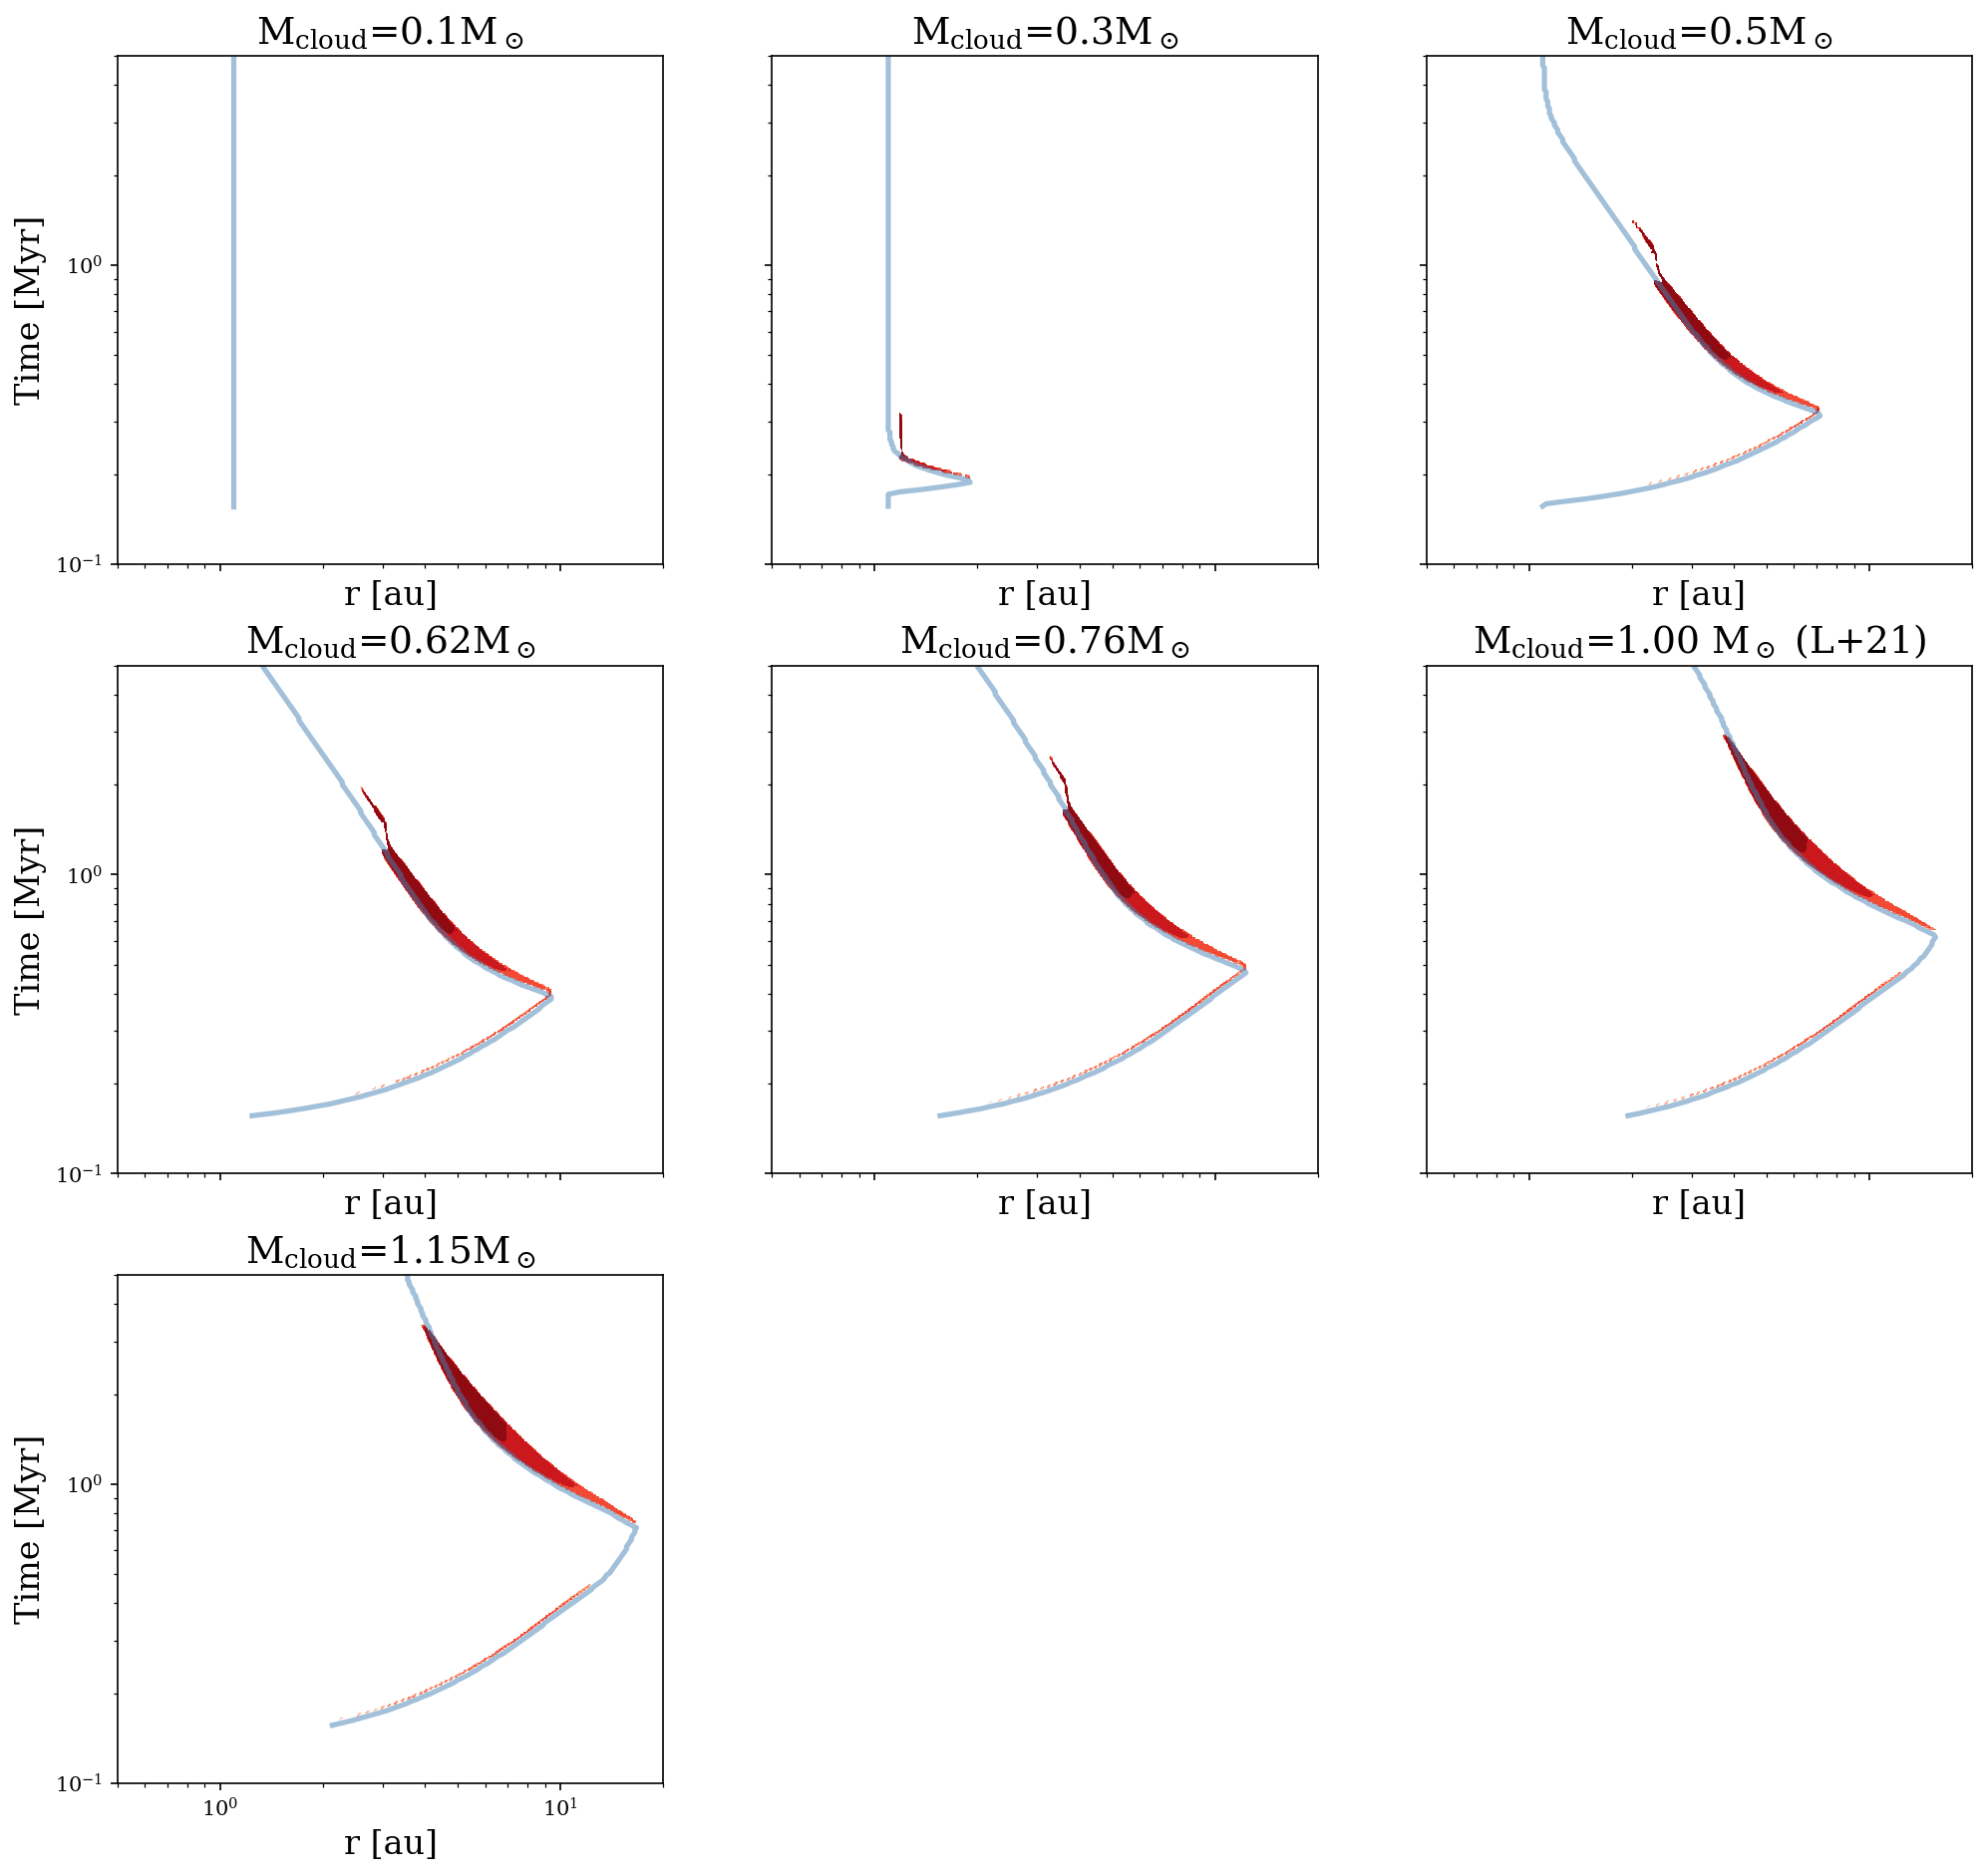

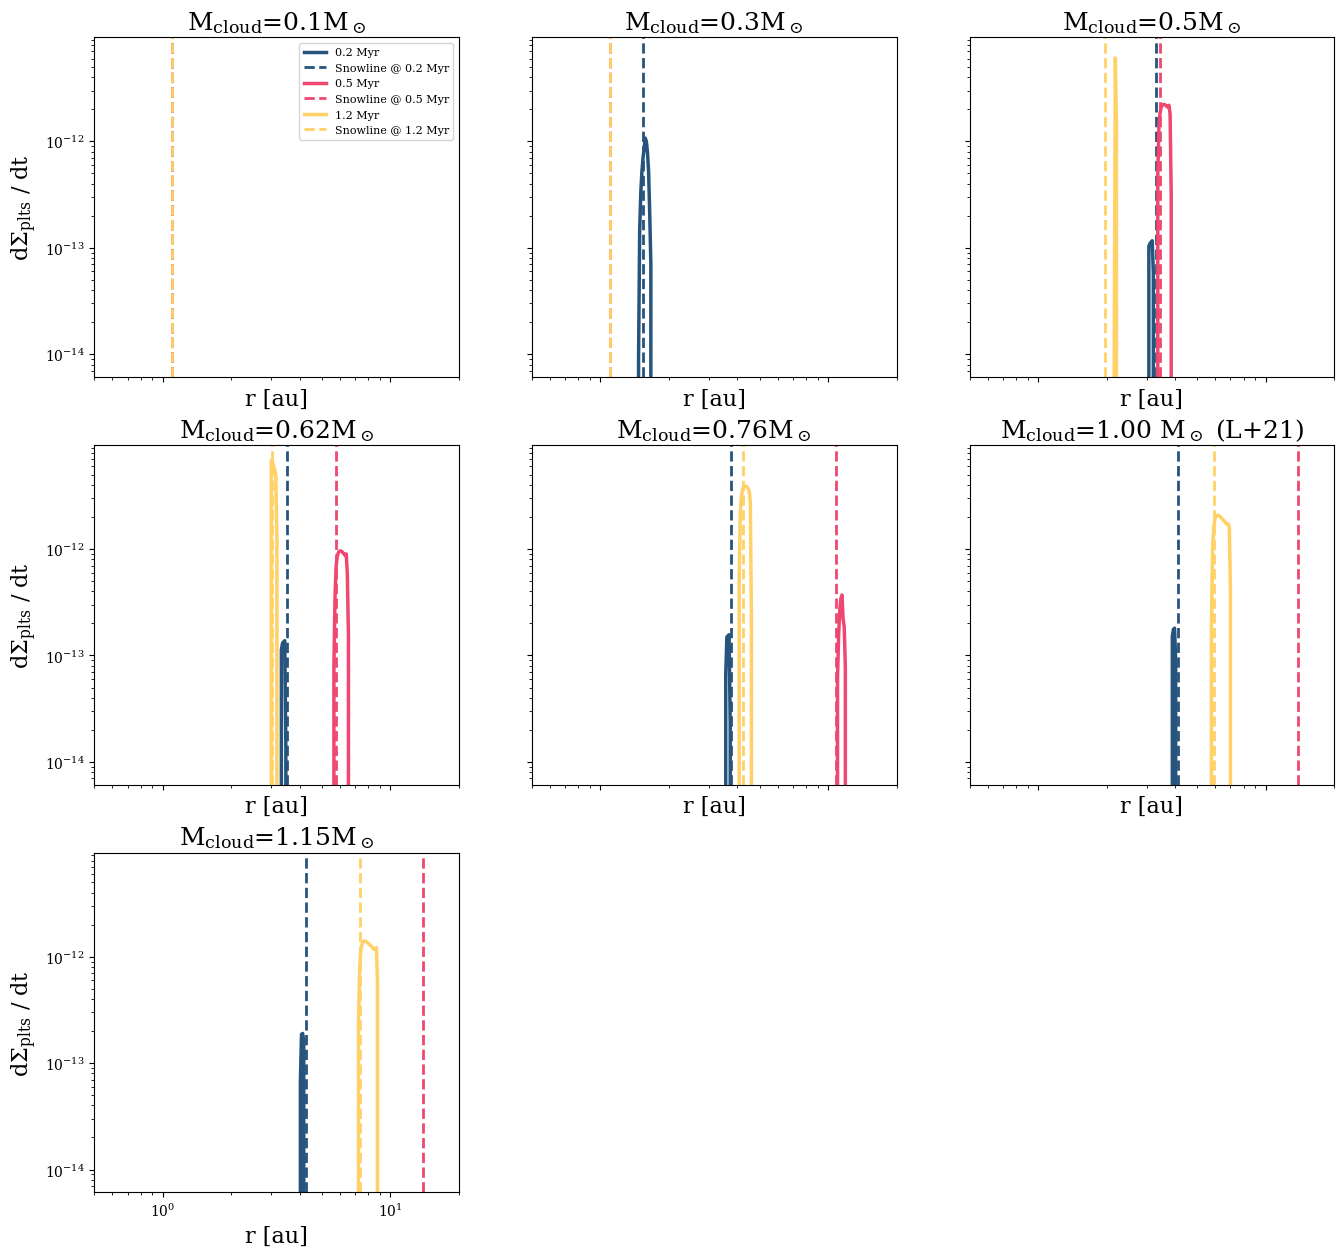

In [ ]:
figsize = (2*len(simulation_array), 15)
Nrow = 3
Ncol = 3
fig, ax = plt.subplots(Nrow, Ncol, figsize=figsize, sharex=True, sharey=True, dpi=150)
fig_plts, ax_plts = plt.subplots(Nrow, Ncol, figsize=figsize, sharex=True, sharey=True) # Also plot in 1D

for axis, axis_plts, sim, clr, title in zip(ax.flat, ax_plts.flat, simulation_array, colors, mass_labels):
    # Planetesimal formation rate
    dSigmaplts = np.diff(sim.sigmaplts, axis=0)
    dt = np.diff(sim.time)
    plts_rate = dSigmaplts/dt[:, None]

    # 2D map
    axis.contourf(sim.rgrid/au, sim.time[1:]/year/1e6, np.log(plts_rate),    # IT'S LOG BASE e?! WHO DOES THAT
            levels=np.arange(-32, -25, 1),
            cmap='Reds')

    it_start = 10
    axis.loglog(sim.snowline_pos[it_start:-1]/au, sim.time[it_start:-1]/year/1e6, color='steelblue', alpha=0.5)
    axis.set_title(f'M$_\\text{{cloud}}$={title}')
    axis.set_xlabel('r [au]')

    # 1D map - plot plts_rate for multiple times
    it_arr = (sim.time/year/1e6).searchsorted([0.2, 0.5, 1.2])
    for it, clr in zip(it_arr, rate_colors):
        axis_plts.loglog(sim.rgrid/au, plts_rate[it], color=clr, label=f'{sim.time[it]/year/1e6:.1f} Myr')
        axis_plts.set_xlim(0.5, 20)
        axis_plts.axvline(sim.snowline_pos[it]/au, alpha=1, linestyle='dashed', lw=2, color=clr, label=f'Snowline @ {sim.time[it]/year/1e6:.1f} Myr')

    # Titles etc.
    axis_plts.set_title(f'M$_\\text{{cloud}}$={title}')
    axis_plts.set_xlabel('r [au]')

ax_plts.flat[0].legend(fontsize=8)
ax[0,0].set_xlim(0.5, 20)
ax[0,0].set_ylim(0.1, 5)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
[axis.set_ylabel('Time [Myr]') for axis in ax[:,0]]
[axis.set_ylabel(r'$\rm{d}\Sigma_{\rm{plts}}~/~\rm{d}t$') for axis in ax_plts[:,0]]

ax[-1,-2].remove()
ax_plts[-1,-2].remove()
ax[-1,-1].remove()
ax_plts[-1,-1].remove()

# Planetesimal formation rate
$$\dfrac{\rm{d}\Sigma_{\rm{plts}}}{\rm{d}t}$$

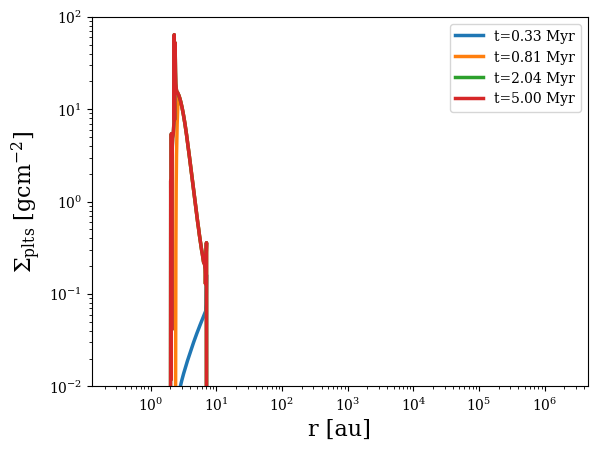

In [ ]:
fig, ax = plt.subplots()

for N in [50, 100, 150, 199]:
    ax.loglog(sim_05.rgrid/au, sim_05.sigmaplts[N], label=f't={sim_05.time[N]/year/1e6:.2f} Myr')
ax.set_ylim(1e-2, 1e2)
ax.set_ylabel(r'$\Sigma_{\rm{plts}}$ [gcm$^{-2}$]')
ax.set_xlabel('r [au]')
ax.legend()

In [ ]:
# Planetesimal formation rate
dSigmaplts = np.diff(sigmaplts, axis=0)
dt = np.diff(time)
plts_rate = dSigmaplts/dt[:, None]


if False:
    plt.contourf(rgrid/au, time[1:]/year/1e6, np.log(plts_rate),    # IT'S LOG BASE e?! WHO DOES THAT
                levels=np.arange(-32, -25, 1))
    plt.xscale('log')
    plt.xlim(0.5, 20)
    plt.ylim(0.1, 5)
    plt.yscale('log')
    plt.colorbar()

NameError: name 'sigmaplts' is not defined

/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_2324/4176181701.py:11: RuntimeWarning: divide by zero encountered in log
  plt.contourf(rgrid/au, time[:reservoir_limit]/year/1e6, np.log(R1_rate),    # IT'S LOG BASE e?! WHO DOES THAT
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_2324/4176181701.py:15: RuntimeWarning: divide by zero encountered in log
  plt.contourf(rgrid/au, time[reservoir_limit:-1]/year/1e6, np.log(R2_rate),    # IT'S LOG BASE e?! WHO DOES THAT


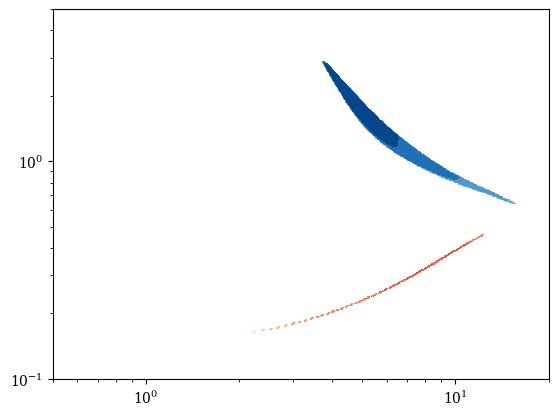

In [ ]:
# Planetesimal reservoirs

reservoir_limit = np.min( np.where( (time/year/1e6) >= 0.6 ) )  # Time index separating reservoirs

R1_rate = plts_rate[:reservoir_limit, :]
R2_rate = plts_rate[reservoir_limit:, :]
R1_sigmaplts = sigmaplts[:reservoir_limit, :]
R2_sigmaplts = sigmaplts[reservoir_limit:, :]


plt.contourf(rgrid/au, time[:reservoir_limit]/year/1e6, np.log(R1_rate),    # IT'S LOG BASE e?! WHO DOES THAT
            levels=np.arange(-32, -25, 1),
            cmap='Reds')

plt.contourf(rgrid/au, time[reservoir_limit:-1]/year/1e6, np.log(R2_rate),    # IT'S LOG BASE e?! WHO DOES THAT
            levels=np.arange(-32, -25, 1),
            cmap='Blues')
plt.xscale('log')
plt.xlim(0.5, 20)
plt.ylim(0.1, 5)
plt.yscale('log')

/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_2324/100828703.py:9: RuntimeWarning: divide by zero encountered in log
  cmap_R1 = ax.contourf(rgrid/au, time[:reservoir_limit]/year/1e6, np.log(R1_rate),    # IT'S LOG BASE e?! WHO DOES THAT
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_2324/100828703.py:13: RuntimeWarning: divide by zero encountered in log
  cmap_R2 = ax.contourf(rgrid/au, time[reservoir_limit:-1]/year/1e6, np.log(R2_rate),    # IT'S LOG BASE e?! WHO DOES THAT


Text(0, 0.5, 'Time, t [Myr]')

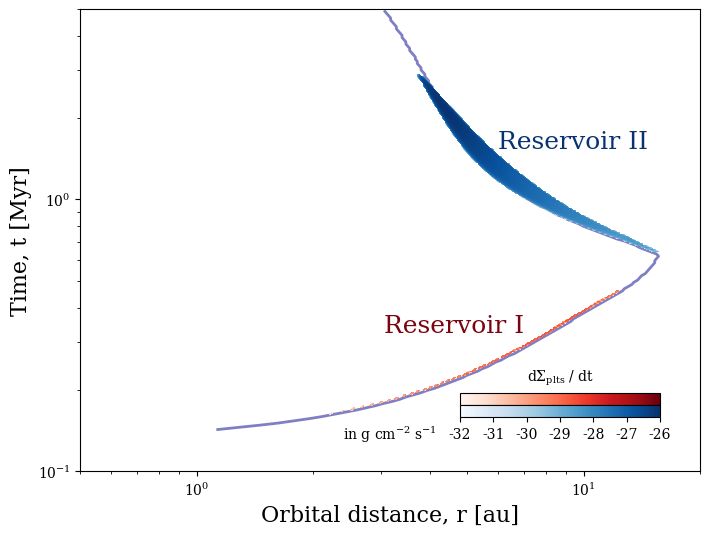

In [ ]:

# levels = np.linspace(-33, -26, 128)

fig, ax = plt.subplots(figsize=(8,6))

levels = np.linspace(-32, -26, 128)
cbar_ticks = np.arange(-32, -25, 1)
ax.loglog(snowline_pos[n:-1]/au, time[n:-1]/year/1e6, color='darkblue', lw=2, zorder=-1, alpha=0.5) # Snowline

cmap_R1 = ax.contourf(rgrid/au, time[:reservoir_limit]/year/1e6, np.log(R1_rate),    # IT'S LOG BASE e?! WHO DOES THAT
                      levels=levels,
                      cmap='Reds')

cmap_R2 = ax.contourf(rgrid/au, time[reservoir_limit:-1]/year/1e6, np.log(R2_rate),    # IT'S LOG BASE e?! WHO DOES THAT
                      levels=levels,
                      cmap='Blues')

# Reservoir labels
ax.text(7, 0.3, 'Reservoir I', transform=ax.get_xaxis_transform(), fontsize=18, color='#79040f', ha='right')
ax.text(6, 0.7, 'Reservoir II', transform=ax.get_xaxis_transform(), fontsize=18, color='#083370')

# Colourbar
cax_x = 0.6
cax_y = 0.2
cax_dy = 0.02
cax_dx = 0.25
cax1 = fig.add_axes((cax_x, cax_y+cax_dy, cax_dx, cax_dy))
cax2 = fig.add_axes((cax_x, cax_y,        cax_dx, cax_dy))
cbar1 = fig.colorbar(cmap_R1, cax=cax1, orientation='horizontal')
cbar2 = fig.colorbar(cmap_R2, cax=cax2, orientation='horizontal')
cax1.xaxis.set_ticks([])
cax2.xaxis.set_ticks(cbar_ticks, np.astype(cbar_ticks, str))
text_x = float(cax_x + cax_dx/2)
text_y = float(cax_y + (2*cax_dy))

# Colourbar labels
ax.text(0.5, 2, r'$\rm{d}\Sigma_{\rm{plts}}~/~\rm{d}t$', transform=cax1.transAxes, ha='center')
ax.text(-0.35, -1.8, r'in g cm$^{-2}$ s$^{-1}$', transform=cax2.transAxes, ha='center')

# cbar = fig.colorbar(cmap_R1)
# cbar2 = fig.colorbar(cmap_R2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.1, 5)
ax.set_xlim(0.5, 20)
ax.set_xlabel('Orbital distance, r [au]')
ax.set_ylabel('Time, t [Myr]')


# Pebble flux

<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_2324/2517012750.py:19: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('Pebble flux [M$_{\oplus}$ Myr$^{-1}$]')


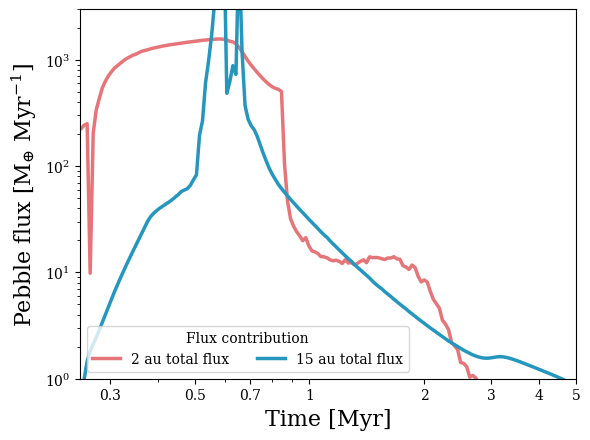

In [ ]:
# Pebble flux
mflux = read_data('mflux')
mdot = read_data('mdot')
# mflux = pd.read_csv(directory+'mflux.dat').values.reshape(201, 1400)
# mdot = pd.read_csv(directory+'mdot.dat').values.reshape(201, 1400)

ME = c.M_earth.cgs.value



fig, ax = plt.subplots()
ir = (rgrid/au).searchsorted([1, 2, 15])
# ax.loglog(time/year/1e6, abs(mflux[:, ir[0]]) / ME * year * 1e6, label='1 au', color='springgreen')
ax.loglog(time/year/1e6, abs(mflux[:, ir[1]]) / ME * year * 1e6, color='#e67579')
ax.loglog(time/year/1e6, abs(mflux[:, ir[2]]) / ME * year * 1e6, color='#2596be')
ax.set_xlim(0.25, 5)
ax.set_ylim(1e0, 3e3)
ax.set_xlabel('Time [Myr]')
ax.set_ylabel('Pebble flux [M$_{\oplus}$ Myr$^{-1}$]')


from matplotlib.lines import Line2D
handles = [Line2D([0], [0], color='#e67579', label='2 au total flux'),
           Line2D([0], [0], color='#2596be', label='15 au total flux'),]
ax.legend(handles=handles, title='Flux contribution', ncols=2, loc='lower left')

ticks = [0.3, 0.5, 0.7, 1, 2, 3, 4, 5]
tick_labels = [str(tick) for tick in ticks]
ax.set_xticks(ticks, tick_labels)

(0.25, 5)

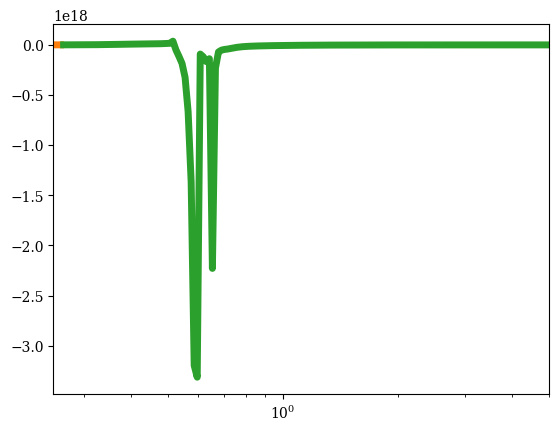

In [ ]:

out_flux = np.where(mflux[:, ir[1]] > 1, mflux[:, ir[2]], np.nan)
in_flux = np.where(mflux[:, ir[1]] < 1, mflux[:, ir[2]], np.nan)
plt.plot(time/year/1e6, mflux[:, ir[2]], label='total flux')
plt.plot(time/year/1e6, out_flux, lw=5, label='outward flux')
plt.plot(time/year/1e6, in_flux, lw=5, label='inward flux')

# plt.plot(time/year/1e6, abs(mflux[:, ir[2]]), zorder=-1)
# plt.plot(time/year/1e6, abs(out_flux), linestyle='dotted', lw=5)


plt.xscale('log')
plt.xlim(0.25, 5)

# Supplementary Materials
## Figure S1

(201, 1400) failed...
(200, 1400) failed...


<>:71: SyntaxWarning: invalid escape sequence '\o'
<>:71: SyntaxWarning: invalid escape sequence '\o'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_2324/2237643225.py:71: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('Mass, M (M$_{\odot}$)')


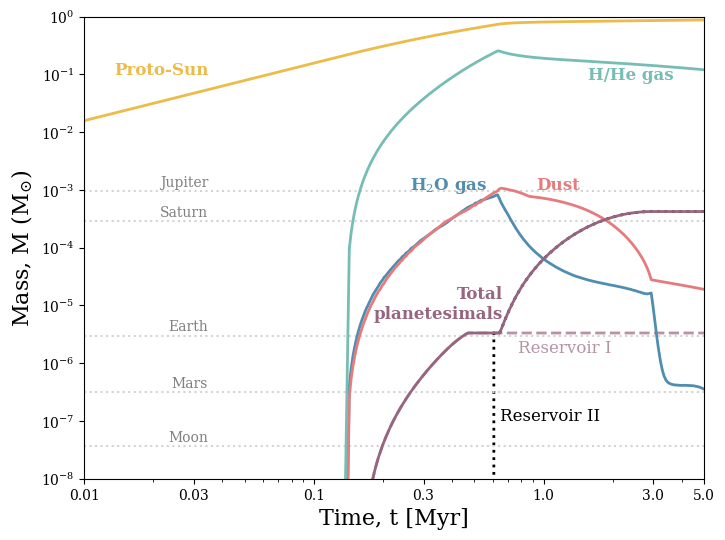

In [ ]:
# Mass evolution of reservoirs
solar_clr = '#ecbb49'
H2O_clr = '#518db0'
dust_clr = '#e67b7e'
plts_clr = '#97657f'
gas_clr = '#76bdb4'

mstar = read_data('mstar')
sigmavap = read_data('sigmavap')
sigma_gas = read_data('sigma')

# dr element for integral
dr = np.zeros_like(rgrid)
dr_from_grid = np.diff(rgrid)
dr_ratio = dr_from_grid[1:]/dr_from_grid[:-1]
dr[:-1] = dr_from_grid
dr[-1] = dr_from_grid[-1] * dr_ratio[0]

# Masses
H2O_gas      = np.sum(2 * np.pi * rgrid * sigmavap * dr, axis=1)
dust_mass    = np.sum(2 * np.pi * rgrid * sigmad * dr, axis=1)
plts_mass    = np.sum(2 * np.pi * rgrid * sigmaplts * dr, axis=1)
gas_mass     = np.sum(2 * np.pi * rgrid * sigma_gas * dr, axis=1)
R1_mass      = np.sum(2 * np.pi * rgrid * R1_sigmaplts * dr, axis=1)
R2_mass      = np.sum(2 * np.pi * rgrid * R2_sigmaplts * dr, axis=1)

# Extend planetesimal mass for flat line
R1_mass_extend = np.zeros_like(time)
R1_mass_extend[:reservoir_limit] = R1_mass
R1_mass_extend[reservoir_limit:] = R1_mass[-1]

R2_mass_extend = np.zeros_like(time)
R2_mass_extend[reservoir_limit:] = R2_mass


M_sun = c.M_sun.cgs.value

fig, ax = plt.subplots(figsize=(8,6))
# Lines
ax.loglog(time/year/1e6, mstar/M_sun, color=solar_clr, lw=2)
ax.loglog(time/year/1e6, H2O_gas/M_sun, color=H2O_clr, lw=2)
ax.loglog(time/year/1e6, dust_mass/M_sun, color=dust_clr, lw=2)
ax.loglog(time/year/1e6, plts_mass/M_sun, color=plts_clr, lw=2)
ax.loglog(time/year/1e6, gas_mass/M_sun, color=gas_clr, lw=2)
ax.loglog(time/year/1e6, R1_mass_extend/M_sun, color=plts_clr, lw=2, linestyle='dashed', alpha=0.7, zorder=-1)
ax.loglog(time/year/1e6, R2_mass_extend/M_sun, color='k', lw=2, linestyle='dotted', zorder=-1)

# Labels
ax.text(0.2, 1e-1, 'Proto-Sun',             color=solar_clr, fontsize=12, ha='right', transform=ax.get_yaxis_transform(), fontweight='bold')
ax.text(0.65, 1e-3, 'H$_2$O gas',           color=H2O_clr, fontsize=12, ha='right', transform=ax.get_yaxis_transform(), fontweight='bold')
ax.text(0.8, 1e-3, 'Dust',                  color=dust_clr, fontsize=12, ha='right', transform=ax.get_yaxis_transform(), fontweight='bold')
ax.text(0.675, 6e-6, 'Total\nplanetesimals', color=plts_clr, fontsize=12, ha='right', transform=ax.get_yaxis_transform(), fontweight='bold')
ax.text(0.95, 8e-2, 'H/He gas',             color=gas_clr, fontsize=12, ha='right', transform=ax.get_yaxis_transform(), fontweight='bold')
ax.text(0.67, 1e-7, 'Reservoir II', color='k', fontsize=12, ha='left', transform=ax.get_yaxis_transform())
ax.text(0.7, 1.5e-6, 'Reservoir I', color=plts_clr, fontsize=12, ha='left', transform=ax.get_yaxis_transform(), alpha=0.7)

# Planets
                # Jupiter           Saturn    Earth                Mars     Moon
planet_masses = [c.M_jup.cgs.value, 5.683e29, c.M_earth.cgs.value, 6.39e26, 7.34e25]
planet_names = ['Jupiter', 'Saturn', 'Earth', 'Mars', 'Moon']

for mass, label in zip(planet_masses, planet_names):
    ax.axhline(mass/M_sun, lw=1.5, color='lightgray', zorder=-1, linestyle='dotted')
    ax.text(0.2, mass/M_sun*1.2, label, transform=ax.get_yaxis_transform(), fontsize=10, color='gray', ha='right')

# Adjustments
ax.set_xlim(0.01, 5)
ax.set_ylim(1e-8, 1e0)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Mass, M (M$_{\odot}$)')
ax.set_xlabel('Time, t [Myr]')

# Set ticks to match Lichtenberg+21
ticks = [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 5.0]
tick_labels = [str(tick) for tick in ticks]
ax.set_xticks(ticks, tick_labels)
ax.yaxis.minorticks_off()

In [ ]:
infall = read_data('infall2')

(201, 1400) failed...
(200, 1400) failed...


Text(0, 0.5, 'Infall rate [g cm$^{-2}$ s$^{-1}$]')

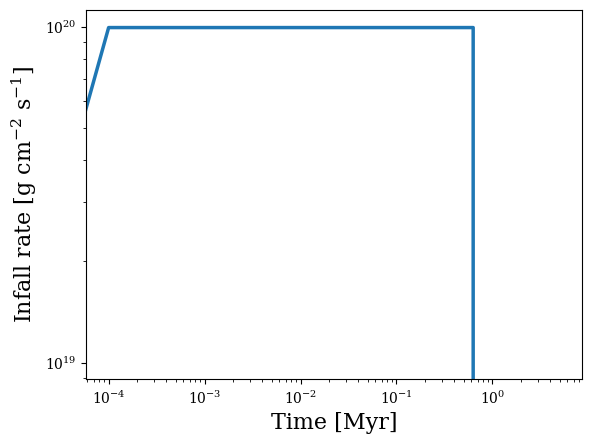

In [ ]:
plt.figure()
plt.loglog(time/year/1e6, infall)
plt.xlabel('Time [Myr]')
plt.ylabel('Infall rate [g cm$^{-2}$ s$^{-1}$]')